# Feature calcuation for Henry's law constants dataset

In [1]:
import requests
import pandas as pd
import numpy as np

import cirpy

import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
# load Henry's law constant dataset
df = pd.read_csv('hcp_values.csv')

In [3]:
df

,Species,InChIKey,Hcp
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008
...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016


In [4]:
df[df['InChIKey'] == 'inchikey']

,Species,InChIKey,Hcp
73,mercury dihydroxide,inchikey,130.00000
628,3-ethyl-2-hexanol,inchikey,0.56000
688,"2,5-dimethyl-4-heptanol",inchikey,0.16000
752,"2,4-dimethyl-3-propyl-3-pentanol",inchikey,1.20000
790,plinol,inchikey,1.20000
...,...,...,...
3977,"2,3-dibromo-5,6-dichloro-1-methoxybenzene",inchikey,0.00910
3978,"2,6-dibromo-3,4,5-trichloro-1-methoxybenzene",inchikey,0.00860
3979,"2,4,6-tribromo-3-chloro-1-methoxybenzene",inchikey,0.00910
4586,heptamethylcyclotetrasiloxanol,inchikey,0.00023


207 species did not come with an InChIKey in the source file.

Looking through publically available datasets, it is difficult to gather more information on many of these compounds, so we will be proceeding without them for now.

In [5]:
df_with_keys = df[df['InChIKey'] != 'inchikey']

In [6]:
# grabbed corresponding SMILES from InChIKey using PubChem Identifier Exchange
smiles = pd.read_csv('hcp_inchikey_smiles.txt', sep='\t', header=None)

In [7]:
smiles

,0,1
0,MYMOFIZGZYHOMD-UHFFFAOYSA-N,O=O
1,CBENFWSGALASAD-UHFFFAOYSA-N,[O-][O+]=O
2,YZCKVEUIGOORGS-UHFFFAOYSA-N,[H]
3,UFHFLCQGNIYNRP-UHFFFAOYSA-N,[4HH]
4,UFHFLCQGNIYNRP-UHFFFAOYSA-N,[HH]
...,...,...
4783,KHQJREYATBQBHY-UHFFFAOYSA-N,CC[Pb](C)(C)C
4784,OLOAJSHVLXNSQV-UHFFFAOYSA-N,CC[Pb](C)(C)CC
4785,KGFRUGHBHNUHOS-UHFFFAOYSA-N,CC[Pb](C)(CC)CC
4786,MRMOZBOQVYRSEM-UHFFFAOYSA-N,CC[Pb](CC)(CC)CC


In [8]:
smiles[smiles[1].isna()]

,0,1
82,inchikey,NaN
281,QRMPKOFEUHIBNM-ZKCHVHJHSA-N,NaN
290,NNBZCPXTIHJBJL-AOOOYVTPSA-N,NaN
291,NNBZCPXTIHJBJL-MGCOHNPYSA-N,NaN
642,inchikey,NaN
...,...,...
4457,INNPZTGYZSAJFN-ZTVUPKSFSA-N,NaN
4669,HKBVRFLHNUEVRO-DWTBGCDMSA-L,NaN
4678,ZKZMJOFIHHZSRW-UHFFFAOYSA-K,NaN
4703,inchikey,NaN


Comparing the tables above, it can be seen that there are more null values than expected. We would have expected only null values for where there is 'inchikey' rather than an actual key but some keys have also returned null values.
So here we will use an alternative method - cirpy - which is a chemical identifier resolver.

In [9]:
# using cirpy to convert inchikeys to smiles
df_with_keys['SMILES'] = [cirpy.resolve(key, 'smiles') for key in df_with_keys['InChIKey']]

/var/folders/jh/glcn73_x74d921x6cbccc_vm0000gn/T/ipykernel_11796/219710436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_keys['SMILES'] = [cirpy.resolve(key, 'smiles') for key in df_with_keys['InChIKey']]


In [10]:
df_with_keys

,Species,InChIKey,Hcp,SMILES
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,O=[O]=O
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H]
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[H][H]
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[2H][2H]
...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,C[Pb](C)(C)C
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CC[Pb](C)(C)C
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CC[Pb](C)(C)CC
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CC[Pb](C)(CC)CC


In [11]:
df_with_keys[df_with_keys['SMILES'].isna()]

,Species,InChIKey,Hcp,SMILES
706,"2-ethyl-2,4-dimethyl-1-pentanol",JIZZVMCXCCJUHI-UHFFFAOYSA-N,1.500000e-01,None
726,"2,2-dimethyl-4-octanol",IVLDCRDTRQCTIY-UHFFFAOYSA-N,1.000000e+00,None
729,3-(1-methylethyl)-1-heptanol,NTGBCQFKKOCODF-UHFFFAOYSA-N,4.400000e-01,None
736,"2,2,4-trimethyl-4-heptanol",KNACVESXMPHLNM-UHFFFAOYSA-N,1.300000e+00,None
744,"4-ethyl-2,2-dimethyl-3-hexanol",UOYRABPBVGDJLW-UHFFFAOYSA-N,1.100000e+00,None
...,...,...,...,...
4293,thidiazimin,HZKBYBNLTLVSPX-JZJYNLBNSA-N,3.500000e+08,None
4294,benthiavalicarb isopropyl,USRKFGIXLGKMKU-IAQYHMDHSA-N,1.100000e+02,None
4350,clethodim,INNPZTGYZSAJFN-ZTVUPKSFSA-N,8.200000e+05,None
4360,vemurafenib,GPXBXXGIAQBQNI-UHFFFAOYSA-N,8.200000e+11,None


This method has also resulted in a list of null values where some InChIKeys did not return a result. Maybe we can try a combination of the two methods to pick up as many missing values as possible. So next, we input the above list of 83 InChIKeys into the PubChem Identifier Exchange Service too see if we can get any more results.

In [12]:
# save to csv to input into exchange service
unmatched_keys = df_with_keys[df_with_keys['SMILES'].isna()]
unmatched_keys.to_csv('unmatched_hcp_keys.csv', index=False)

In [13]:
# importing the exchange results
matched_keys = pd.read_csv('matched_hcp_keys_smiles.txt', sep='\t', header=None)

In [14]:
matched_keys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       83 non-null     object
 1   1       40 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


We managed to get an additional 40 smiles strings that cirpy could not get.

In [15]:
# now merging these found smiles to the results dataframe
df_with_keys = df_with_keys.join(matched_keys.set_index(0), on='InChIKey')

In [16]:
df_with_keys

,Species,InChIKey,Hcp,SMILES,1
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O,NaN
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,O=[O]=O,NaN
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H],NaN
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[H][H],NaN
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[2H][2H],NaN
...,...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,C[Pb](C)(C)C,NaN
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CC[Pb](C)(C)C,NaN
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CC[Pb](C)(C)CC,NaN
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CC[Pb](C)(CC)CC,NaN


In [17]:
# merging SMILES and 1 columns together
df_with_keys[1].fillna(df_with_keys['SMILES'], inplace=True)
del df_with_keys['SMILES']
df_with_keys.rename(columns={1: 'SMILES'}, inplace=True)

In [18]:
df_with_keys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4425 entries, 0 to 4631
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   4425 non-null   object 
 1   InChIKey  4425 non-null   object 
 2   Hcp       4398 non-null   float64
 3   SMILES    4382 non-null   object 
dtypes: float64(1), object(3)
memory usage: 172.9+ KB


We now need to drop null values as they will be of no help in the regression models.

In [19]:
# first looking at SMILES null values - if they are null we can't get any descriptors so these rows are useless 
final_df = df_with_keys[~df_with_keys['SMILES'].isna()]

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4631
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   4382 non-null   object 
 1   InChIKey  4382 non-null   object 
 2   Hcp       4355 non-null   float64
 3   SMILES    4382 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.2+ KB


In [21]:
final_df[final_df['Hcp'].isna()]

,Species,InChIKey,Hcp,SMILES
38,chlorine nitrate,XYLGPCWDPLOBGP-UHFFFAOYSA-N,NaN,[O-][N+](=O)OCl
47,bromine nitrate,RRTWEEAEXPZMPY-UHFFFAOYSA-N,NaN,[O-][N+](=O)OBr
51,hydrogen iodide,XMBWDFGMSWQBCA-UHFFFAOYSA-N,NaN,[H+].[I-]
57,sulfur trioxide,AKEJUJNQAAGONA-UHFFFAOYSA-N,NaN,O=[S](=O)=O
497,"9,10-dimethyl-benz[$a$]anthracene",GKVUDAZMZLMNJQ-UHFFFAOYSA-N,NaN,Cc1cc2cc3ccc4ccccc4c3cc2cc1C
510,coronene,VPUGDVKSAQVFFS-UHFFFAOYSA-N,NaN,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67
892,"1,9-nonanediol",ALVZNPYWJMLXKV-UHFFFAOYSA-N,NaN,OCCCCCCCCCO
893,"1,10-decanediol",FOTKYAAJKYLFFN-UHFFFAOYSA-N,NaN,OCCCCCCCCCCO
934,undecanal,KMPQYAYAQWNLME-UHFFFAOYSA-N,NaN,CCCCCCCCCCC=O
995,2-methylcyclohexanone,LFSAPCRASZRSKS-UHFFFAOYSA-N,NaN,CC1CCCCC1=O


A reminder here that any null Hcp value is a result of pandas unable to convert the strings to floats - this is as a result of special characters such as inequalities and infinity signs. Since they are not exact values we can get rid of these as well.

In [22]:
# getting rid of null Hcp values
final_df = final_df[~final_df['Hcp'].isna()]

In [23]:
final_df

,Species,InChIKey,Hcp,SMILES
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,O=[O]=O
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H]
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[H][H]
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[2H][2H]
...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,C[Pb](C)(C)C
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CC[Pb](C)(C)C
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CC[Pb](C)(C)CC
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CC[Pb](C)(CC)CC


In [24]:
# resetting indexes
final_df.reset_index(drop=True, inplace=True)

In [25]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(final_df, 'SMILES', 'Mol')

RDKit ERROR: [20:53:54] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [20:53:54] SMILES Parse Error: syntax error while parsing: O([Cl]=O)[?]
[20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] SMILES Parse Error: syntax error while parsing: O([Cl]=O)[?]
RDKit ERROR: [20:53:54] SMILES Parse Error: Failed parsing SMILES 'O([Cl]=O)[?]' for input: 'O([Cl]=O)[?]'
RDKit ERROR: [20:53:54] SMILES Parse Error: syntax error while parsing: [Cl-]|[NH+]([O-])=O
[20:53:54] SMILES Parse Error: Failed parsing SMIL

RDKit SMILES Parse Errors came up for the following molecules so they were fixed manually.
- `O([Cl]=O)[?]` -> `O=[Cl]=O`
- `[Cl-]|[NH+]([O-])=O` -> `[NH+](=O)[O-].[Cl-]`
- `[Br-]|[NH+]([O-])=O` -> `[NH+](=O)[O-].[Br-]`
- `O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC` -> `CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC`
- `O(|[Sn](CC(C)(C)c1ccccc1)(CC(C)(C)c2ccccc2)CC(C)(C)c3ccccc3)|[Sn](CC(C)(C)c4ccccc4)(CC(C)(C)c5ccccc5)CC(C)(C)c6ccccc6` -> `CC(C)(C[Sn](CC(C)(C)c1ccccc1)(CC(C)(C)c2ccccc2)O[Sn](CC(C)(C)c3ccccc3)(CC(C)(C)c4ccccc4)CC(C)(C)c5ccccc5)c6ccccc6`
- `C[Hg+]|[NH-]C(N)=NC#N` -> `C[Hg]N=C(N)NC#N`

These are looked up in the dataframe for their InChIKey/name which will then be used to find the right SMILES string from an appropriate database.

In [26]:
# an example of the queries made
final_df.loc[final_df['SMILES'] == 'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC']

,Species,InChIKey,Hcp,SMILES,Mol
4324,hexabutyldistannoxane,APQHKWPGGHMYKJ-UHFFFAOYSA-N,76.0,O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC,None


In [27]:
# correcting the above SMILES strings
final_df.replace({'SMILES':{
    'O([Cl]=O)[?]': 'O=[Cl]=O', 
    '[Cl-]|[NH+]([O-])=O': '[NH+](=O)[O-].[Cl-]', 
    '[Br-]|[NH+]([O-])=O': '[NH+](=O)[O-].[Br-]', 
    'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC': 'CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC',
    'O(|[Sn](CC(C)(C)c1ccccc1)(CC(C)(C)c2ccccc2)CC(C)(C)c3ccccc3)|[Sn](CC(C)(C)c4ccccc4)(CC(C)(C)c5ccccc5)CC(C)(C)c6ccccc6': 'CC(C)(C[Sn](CC(C)(C)c1ccccc1)(CC(C)(C)c2ccccc2)O[Sn](CC(C)(C)c3ccccc3)(CC(C)(C)c4ccccc4)CC(C)(C)c5ccccc5)c6ccccc6',
    'C[Hg+]|[NH-]C(N)=NC#N': 'C[Hg]N=C(N)NC#N'}}, inplace=True)

In [28]:
# trying again to add a Mol column into the dataframe using corrected SMILES
PandasTools.AddMoleculeColumnToFrame(final_df, 'SMILES', 'Mol')

RDKit ERROR: [20:53:54] Explicit valence for atom # 1 O, 4, is greater than permitted
[20:53:54] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [20:53:54] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] WARNING: not removing hydrogen atom without neighbors
[20:53:54] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[20:53:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:53:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:5

In [29]:
descriptors = list(rdMolDescriptors.Properties.GetAvailableProperties())

get_descriptors = rdMolDescriptors.Properties(descriptors)

In [30]:
final_df['Descriptors'] = [get_descriptors.ComputeProperties(mol) for mol in final_df['Mol']]

ArgumentError: Python argument types in
    Properties.ComputeProperties(Properties, NoneType)
did not match C++ signature:
    ComputeProperties(RDKit::Descriptors::Properties {lvalue}, RDKit::ROMol mol, bool annotateMol=False)

Some SMILES have not resulted in a Mol file - instead gave a None

In [33]:
final_df[final_df['Mol'].isna()]

,Species,InChIKey,Hcp,SMILES,Mol
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.0001,O=[O]=O,None
35,chlorine dioxide,OSVXSBDYLRYLIG-UHFFFAOYSA-N,0.0100,O=[Cl]=O,None


We can try and fix the SMILES and see if it then gives a Mol

In [35]:
# correcting the above SMILES strings
final_df.replace({'SMILES':{
    'O=[O]=O': '[O-][O+]=O',
    'O=[Cl]=O': 'O=Cl[O]'}}, inplace=True)

In [37]:
# trying again to add a Mol column into the dataframe using the corrected SMILES
PandasTools.AddMoleculeColumnToFrame(final_df, 'SMILES', 'Mol')

RDKit WARNING: [21:20:14] WARNING: not removing hydrogen atom without neighbors
[21:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:14] WARNING: not removing hydrogen atom without neighbors
[21:20:14] WARNING: not removing hydrogen atom without neighbors
[21:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:15] WARNING: not removing hydrogen atom without neighbors
[21:20:14] WARNING: not removing hydrogen atom without neighbors
[21:20:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:20:15] WARNING: not removing hydrogen atom without neighbors
[21:20:15] WARNING: not removing hydrogen atom without neighbors
[21:20:15] WARNING: not removing hydrogen atom wit

In [38]:
# trying again to calculate descriptors
final_df['Descriptors'] = [get_descriptors.ComputeProperties(mol) for mol in final_df['Mol']]

,Species,InChIKey,Hcp,SMILES,Mol,Descriptors
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O,,"[31.98982924, 31.998, 2.0, 0.0, 0.0, 0.0, 2.0,..."
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,[O-][O+]=O,,"[47.984743859999995, 47.997, 3.0, 0.0, 0.0, 0...."
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H],,"[1.007825032, 1.008, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[H][H],,"[2.015650064, 2.016, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[2H][2H],,"[4.028203556, 4.028203556, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...
4350,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,C[Pb](C)(C)C,,"[268.070552484, 267.34, 0.0, 0.0, 0.0, 0.0, 0...."
4351,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CC[Pb](C)(C)C,,"[282.086202548, 281.367, 0.0, 0.0, 1.0, 0.0, 0..."
4352,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CC[Pb](C)(C)CC,,"[296.101852612, 295.39400000000006, 0.0, 0.0, ..."
4353,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CC[Pb](C)(CC)CC,,"[310.117502676, 309.4210000000001, 0.0, 0.0, 3..."

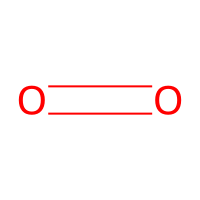
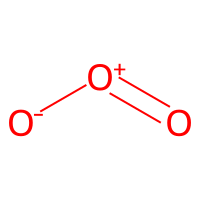
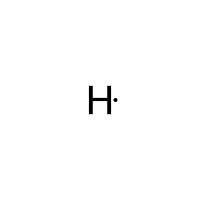
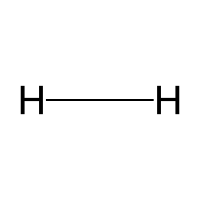
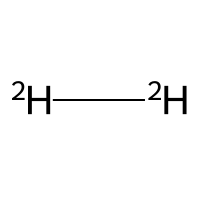
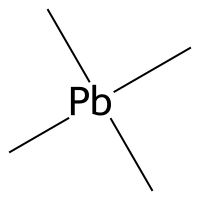
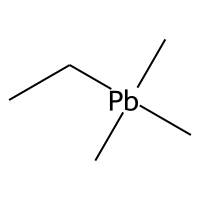
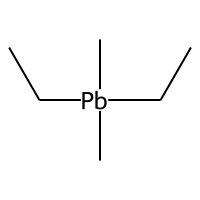
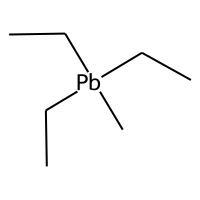
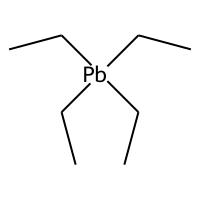

In [39]:
final_df

In [43]:
# splitting the lists of descriptors into separate columns
descriptors_df = pd.DataFrame(final_df['Descriptors'].to_list(), columns=descriptors)

In [44]:
# merging the two dataframes together
final_df = pd.concat([final_df, descriptors_df], axis=1)

In [47]:
# dropping the original descriptors column containing the descriptors lists
final_df.drop('Descriptors', axis=1, inplace=True)

,Species,InChIKey,Hcp,SMILES,Mol,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O,,31.989829,31.998000,2.0,0.0,0.0,...,0.816497,0.166667,0.000000,0.000000,0.00,-0.400000,1.600000,0.600000,-4.900000,0.480000
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,[O-][O+]=O,,47.984744,47.997000,3.0,0.0,0.0,...,1.224745,0.333333,0.000000,0.000000,0.00,-0.600000,2.400000,1.400000,1.400000,1.120000
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H],,1.007825,1.008000,0.0,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[H][H],,2.015650,2.016000,0.0,0.0,0.0,...,2.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[2H][2H],,4.028204,4.028204,0.0,0.0,0.0,...,2.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,C[Pb](C)(C)C,,268.070552,267.340000,0.0,0.0,0.0,...,4.500000,2.000000,0.000000,0.000000,0.00,0.922078,5.922078,1.580185,49.430707,1.871596
4351,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CC[Pb](C)(C)C,,282.086203,281.367000,0.0,0.0,1.0,...,5.207107,2.560660,1.060660,1.060660,0.00,0.922078,6.922078,2.286088,4.922078,2.637413
4352,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CC[Pb](C)(C)CC,,296.101853,295.394000,0.0,0.0,2.0,...,5.914214,3.121320,1.914214,1.914214,0.25,0.922078,7.922078,3.049669,3.499939,3.451388
4353,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CC[Pb](C)(CC)CC,,310.117503,309.421000,0.0,0.0,3.0,...,6.621320,3.681981,2.560660,2.560660,0.75,0.922078,8.922078,3.855732,2.465923,4.300142

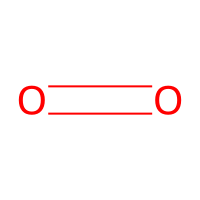
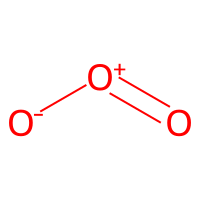
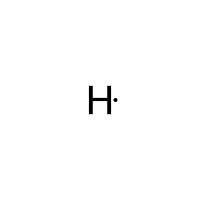
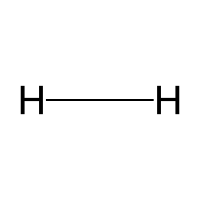
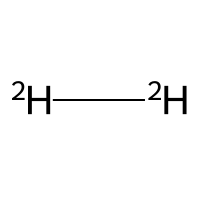
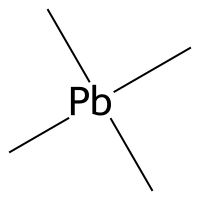
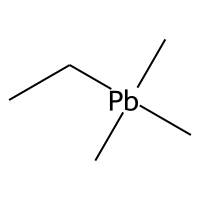
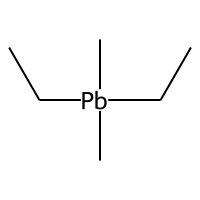
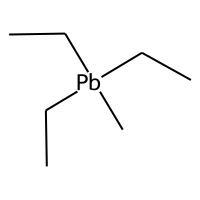
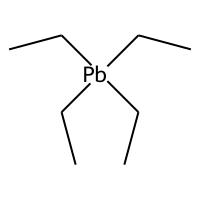

In [48]:
final_df

In [49]:
final_df.to_csv('hcp_features.csv', index=False)

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Species                          4355 non-null   object 
 1   InChIKey                         4355 non-null   object 
 2   Hcp                              4355 non-null   float64
 3   SMILES                           4355 non-null   object 
 4   Mol                              4355 non-null   object 
 5   exactmw                          4355 non-null   float64
 6   amw                              4355 non-null   float64
 7   lipinskiHBA                      4355 non-null   float64
 8   lipinskiHBD                      4355 non-null   float64
 9   NumRotatableBonds                4355 non-null   float64
 10  NumHBD                           4355 non-null   float64
 11  NumHBA                           4355 non-null   float64
 12  NumHeavyAtoms       